In [3]:
from sklearn.metrics.scorer import SCORERS
print(SCORERS.keys())

['f1', 'f1_weighted', 'f1_samples', 'recall_samples', 'recall_micro', 'adjusted_rand_score', 'recall_macro', 'mean_absolute_error', 'precision_macro', 'precision_weighted', 'f1_macro', 'recall_weighted', 'accuracy', 'precision_samples', 'median_absolute_error', 'precision', 'log_loss', 'precision_micro', 'average_precision', 'roc_auc', 'r2', 'recall', 'mean_squared_error', 'f1_micro']


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
np.set_printoptions(precision=2)

digits = load_digits()
X, y = digits.data, digits.target == 3
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [2]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': 10. ** np.arange(-3, 3), 'gamma': 10. ** np.arange(-3, 3)}
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'C': 10.0, 'gamma': 0.001}
0.997777777778


In [3]:
from sklearn.cross_validation import cross_val_score
cross_val_score(SVC(), X_train, y_train)

array([ 0.89,  0.89,  0.89])

In [4]:
from sklearn.dummy import DummyClassifier
cross_val_score(DummyClassifier("most_frequent"), X_train, y_train)

array([ 0.89,  0.89,  0.89])

()
()
()


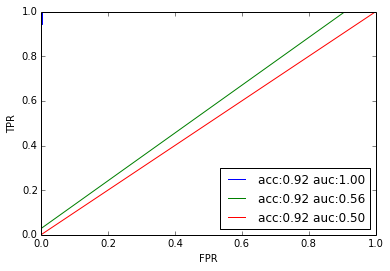

In [5]:
from sklearn.metrics import roc_curve, roc_auc_score

for gamma in [.01, .1, 1]:
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    svm = SVC(gamma=gamma).fit(X_train, y_train)
    decision_function = svm.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, decision_function)
    acc = svm.score(X_test, y_test)
    auc = roc_auc_score(y_test, svm.decision_function(X_test))
    plt.plot(fpr, tpr, label="acc:%.2f auc:%.2f" % (acc, auc))
    print()
plt.legend(loc="best")

In [6]:
from sklearn.metrics.scorer import SCORERS

In [7]:
SCORERS.keys()

['adjusted_rand_score',
 'f1',
 'mean_absolute_error',
 'r2',
 'recall',
 'median_absolute_error',
 'precision',
 'log_loss',
 'mean_squared_error',
 'roc_auc',
 'average_precision',
 'accuracy']

In [8]:
from sklearn.metrics.scorer import accuracy_scorer

def my_super_scoring(est, X, y):
	return accuracy_scorer(est, X, y) - np.mean(est.coef_ != 0)


In [9]:
from sklearn.svm import LinearSVC
y = digits.target
grid = GridSearchCV(LinearSVC(C=.01, dual=False), param_grid={'penalty' : ['l1', 'l2']}, scoring=my_super_scoring)
grid.fit(X, y)
print(grid.best_params_)

{'penalty': 'l1'}


In [10]:
from sklearn.metrics.scorer import make_scorer

def scoring_function(y_true, y_pred):
	return (np.abs(y_true - y_pred) < 3).mean()
    
tolerant_scoring = make_scorer(scoring_function)
print(cross_val_score(LinearSVC(random_state=0), X, y))
print(cross_val_score(LinearSVC(random_state=0), X, y, scoring=tolerant_scoring))

[ 0.88  0.94  0.88]
[ 0.92  0.96  0.91]
